In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-08-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-02-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-06-02-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-04-01-02-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-01-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-02-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-03-01-01-01-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-07-01-02-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_02/03-01-05-01-01-02-02.wav
/kaggle/input/ravdess-emotional-speech-audio/Actor_0

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import librosa as ls
import os

In [4]:
emotion_dic = {
                '01' : 'neutral', 
                '02' : 'calm' ,
                '03' : 'happy' ,
                '04' : 'sad' ,
                '05' : 'angry', 
                '06' : 'fearful' ,
                '07' : 'disgust', 
                '08' : 'surprised'
}

In [5]:
our_emotion = ['happy','sad','angry','disgust']

In [6]:
from glob import glob

In [7]:
def extract_feature(file_name, mfcc, chroma, mel):
        X,sample_rate = ls.load(file_name)
        if chroma:
            stft=np.abs(ls.stft(X))
            result=np.array([])
        if mfcc:
            mfccs=np.mean(ls.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T, axis=0)
            result=np.hstack((result, mfccs))
        if chroma:
            chroma=np.mean(ls.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(ls.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        return result


In [8]:
audio_files = glob('/kaggle/input/ravdess-emotional-speech-audio'+'/*/*.wav')

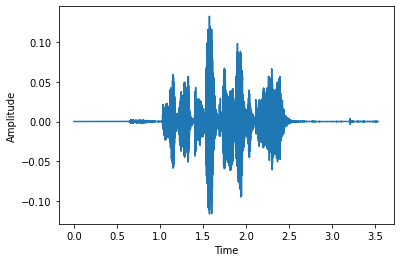

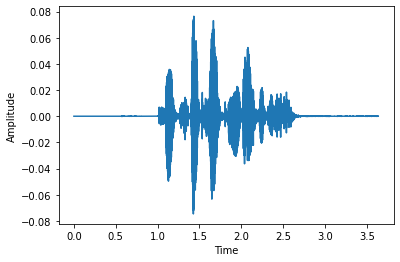

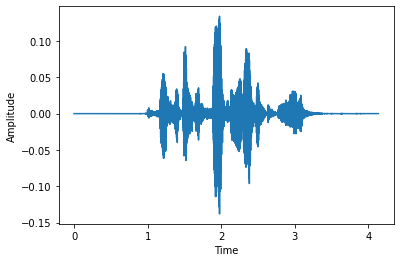

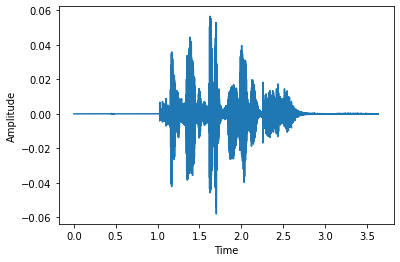

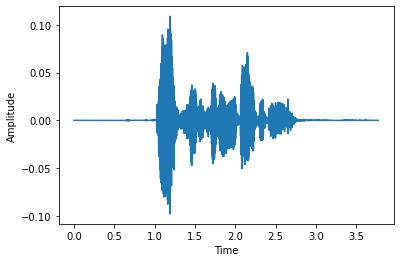

In [9]:
for i in range(5):
    audio,sfreq = ls.load(audio_files[i])
    time = np.arange(0,len(audio))/sfreq
    fig,ax = plt.subplots()
    ax.plot(time,audio)
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')

In [10]:
x,y=[],[]
from IPython.display import clear_output
e = set()
for file in audio_files:
        clear_output(wait=True)
        file_name = file.split('/')[-1]
        emotion=emotion_dic[file_name.split("-")[2]]
        if emotion not in our_emotion:
            continue
        e.add(file.split('/')[-2])
        feature=extract_feature(file, mfcc=True, chroma=True, mel=True)
        print(e)
        x.append(feature)
        y.append(emotion)

{'Actor_10', 'Actor_15', 'Actor_13', 'Actor_16', 'Actor_21', 'Actor_14', 'Actor_02', 'Actor_24', 'Actor_11', 'Actor_09', 'Actor_06', 'Actor_01', 'Actor_22', 'Actor_03', 'Actor_18', 'Actor_04', 'Actor_19', 'Actor_23', 'Actor_20', 'Actor_17', 'Actor_07', 'Actor_05', 'Actor_12', 'Actor_08'}


In [11]:
x = np.array(x)
x

array([[-5.74378479e+02,  4.63589439e+01, -1.24105911e+01, ...,
         2.67483829e-05,  9.21865194e-06,  1.25310316e-06],
       [-6.44543274e+02,  5.80150223e+01, -1.36853714e+01, ...,
         2.12256691e-06,  5.48321623e-07,  5.87089133e-08],
       [-6.55341492e+02,  4.36778603e+01, -5.21891832e+00, ...,
         4.27335872e-05,  8.81820779e-06,  9.86391569e-07],
       ...,
       [-5.95433716e+02,  7.41435165e+01, -9.41725826e+00, ...,
         1.36955687e-05,  3.88217632e-06,  5.55120550e-07],
       [-5.84805847e+02,  5.15535736e+01,  1.82677040e+01, ...,
         1.02074118e-03,  2.99175619e-04,  2.60626621e-05],
       [-3.63736145e+02,  3.35501442e+01, -1.26321859e+01, ...,
         7.38519942e-03,  2.39345222e-03,  1.43654121e-04]])

In [12]:
y

['disgust',
 'disgust',
 'sad',
 'happy',
 'disgust',
 'angry',
 'happy',
 'sad',
 'happy',
 'disgust',
 'angry',
 'happy',
 'angry',
 'angry',
 'angry',
 'happy',
 'angry',
 'angry',
 'happy',
 'sad',
 'disgust',
 'sad',
 'disgust',
 'happy',
 'angry',
 'sad',
 'sad',
 'disgust',
 'sad',
 'sad',
 'happy',
 'disgust',
 'angry',
 'happy',
 'disgust',
 'happy',
 'angry',
 'disgust',
 'sad',
 'happy',
 'angry',
 'sad',
 'angry',
 'happy',
 'angry',
 'angry',
 'disgust',
 'happy',
 'disgust',
 'disgust',
 'sad',
 'happy',
 'disgust',
 'angry',
 'sad',
 'sad',
 'happy',
 'sad',
 'angry',
 'happy',
 'disgust',
 'disgust',
 'sad',
 'sad',
 'disgust',
 'angry',
 'disgust',
 'angry',
 'angry',
 'angry',
 'sad',
 'happy',
 'happy',
 'sad',
 'sad',
 'sad',
 'happy',
 'angry',
 'disgust',
 'happy',
 'angry',
 'happy',
 'sad',
 'sad',
 'disgust',
 'disgust',
 'disgust',
 'angry',
 'happy',
 'angry',
 'disgust',
 'happy',
 'sad',
 'disgust',
 'sad',
 'happy',
 'happy',
 'disgust',
 'sad',
 'angry',


In [13]:
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
y = lb.fit_transform(y)
y

array([1, 1, 3, 2, 1, 0, 2, 3, 2, 1, 0, 2, 0, 0, 0, 2, 0, 0, 2, 3, 1, 3,
       1, 2, 0, 3, 3, 1, 3, 3, 2, 1, 0, 2, 1, 2, 0, 1, 3, 2, 0, 3, 0, 2,
       0, 0, 1, 2, 1, 1, 3, 2, 1, 0, 3, 3, 2, 3, 0, 2, 1, 1, 3, 3, 1, 0,
       1, 0, 0, 0, 3, 2, 2, 3, 3, 3, 2, 0, 1, 2, 0, 2, 3, 3, 1, 1, 1, 0,
       2, 0, 1, 2, 3, 1, 3, 2, 2, 1, 3, 0, 0, 3, 1, 1, 1, 2, 1, 3, 0, 0,
       1, 0, 2, 2, 2, 0, 0, 2, 2, 3, 1, 3, 3, 3, 3, 0, 2, 1, 1, 3, 3, 1,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 3, 2, 3, 1, 1, 3, 2, 0, 1, 1, 0, 2, 1,
       3, 3, 2, 2, 3, 2, 3, 2, 2, 1, 0, 3, 3, 0, 0, 2, 0, 1, 2, 3, 2, 1,
       1, 2, 2, 1, 3, 0, 0, 1, 3, 3, 3, 0, 1, 0, 1, 2, 3, 3, 1, 0, 2, 0,
       2, 0, 1, 1, 1, 0, 3, 0, 0, 3, 3, 2, 2, 0, 2, 1, 3, 2, 3, 2, 2, 1,
       3, 1, 1, 0, 0, 0, 3, 0, 2, 2, 1, 1, 2, 3, 1, 0, 3, 2, 3, 2, 3, 2,
       3, 0, 1, 1, 0, 3, 2, 0, 2, 0, 1, 1, 3, 1, 1, 0, 2, 1, 1, 3, 2, 1,
       2, 2, 3, 3, 2, 2, 1, 2, 1, 0, 2, 0, 3, 3, 0, 3, 3, 1, 0, 3, 0, 0,
       0, 1, 0, 0, 3, 0, 0, 1, 0, 3, 1, 2, 1, 3, 1,

In [14]:
y = to_categorical(y)
print(y.shape)
print(y)

(768, 4)
[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [1. 0. 0. 0.]]


In [15]:
from sklearn.preprocessing import MinMaxScaler
scaler  =  MinMaxScaler()
x = scaler.fit_transform(x)


In [16]:
x

array([[4.94830354e-01, 5.03606057e-01, 5.20444116e-01, ...,
        1.06565902e-03, 1.08479113e-03, 1.67887181e-03],
       [3.63641468e-01, 6.17984087e-01, 5.03941952e-01, ...,
        7.94563045e-05, 5.45322577e-05, 6.88943490e-05],
       [3.43451768e-01, 4.77297289e-01, 6.13541071e-01, ...,
        1.70582671e-03, 1.03720803e-03, 1.31935931e-03],
       ...,
       [4.55462847e-01, 7.76248757e-01, 5.59193122e-01, ...,
        5.42926255e-04, 4.50680183e-04, 7.38029809e-04],
       [4.75334040e-01, 5.54579591e-01, 9.17577847e-01, ...,
        4.08725997e-02, 3.55391575e-02, 3.51207865e-02],
       [8.88673635e-01, 3.77916676e-01, 5.17575548e-01, ...,
        2.95753331e-01, 2.84393233e-01, 1.93627576e-01]])

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42,shuffle=True)

In [18]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten

In [19]:
x = np.expand_dims(x,axis=2)

In [34]:
model = Sequential()
model.add(Dense(256,input_shape=(x.shape[-1],180)))
model.add(Dense(512))
model.add(Dropout(0.25))
model.add(Dense(512))
model.add(Dense(256))
model.add(Flatten())
model.add(Dense(4,activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 1, 256)            46336     
_________________________________________________________________
dense_21 (Dense)             (None, 1, 512)            131584    
_________________________________________________________________
dropout_4 (Dropout)          (None, 1, 512)            0         
_________________________________________________________________
dense_22 (Dense)             (None, 1, 512)            262656    
_________________________________________________________________
dense_23 (Dense)             (None, 1, 256)            131328    
_________________________________________________________________
flatten_4 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_24 (Dense)             (None, 4)                

In [35]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])


In [36]:
model.fit(x_train,y_train,batch_size = 64,epochs=150,validation_data=(x_test,y_test))

Epoch 1/150
11/11 [==============================] - 1s 33ms/step - loss: 1.7649 - accuracy: 0.3197 - val_loss: 1.2301 - val_accuracy: 0.4805
Epoch 2/150
11/11 [==============================] - 0s 15ms/step - loss: 1.1582 - accuracy: 0.4559 - val_loss: 1.1483 - val_accuracy: 0.4545
Epoch 3/150
11/11 [==============================] - 0s 13ms/step - loss: 1.0684 - accuracy: 0.5123 - val_loss: 1.1621 - val_accuracy: 0.4545
Epoch 4/150
11/11 [==============================] - 0s 13ms/step - loss: 0.9817 - accuracy: 0.5449 - val_loss: 1.0781 - val_accuracy: 0.5714
Epoch 5/150
11/11 [==============================] - 0s 13ms/step - loss: 0.9548 - accuracy: 0.5931 - val_loss: 0.9936 - val_accuracy: 0.5714
Epoch 6/150
11/11 [==============================] - 0s 13ms/step - loss: 0.9057 - accuracy: 0.6186 - val_loss: 1.0065 - val_accuracy: 0.5195
Epoch 7/150
11/11 [==============================] - 0s 13ms/step - loss: 0.9194 - accuracy: 0.5752 - val_loss: 1.0341 - val_accuracy: 0.5844
Epoch 

In [37]:
model.save('Speech-Emotion-Recognition.h5')

Hurray!! Our trained model is saved in "Speech-Emotion-Recognition.h5"
We got the maximum training accuracy of `82%` and maximum validation accuracy of `71%`